# Leaf Disease Detection

In [ ]:
# !pip install numpy pandas tensorflow

In [1]:
import numpy as np
import pandas as pd
import tensorflow
import os

import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [2]:
os.listdir('data/dataset/')

['train', 'val']

In [3]:
train_datagen = ImageDataGenerator(zoom_range=0.5,shear_range=0.3,horizontal_flip=True,preprocessing_function=preprocess_input)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [4]:
train = train_datagen.flow_from_directory('data/dataset/train',
                                          target_size=(256,256),
                                          batch_size=32)

val = train_datagen.flow_from_directory('data/dataset/val',
                                          target_size=(256,256),
                                          batch_size=32)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [5]:
ref = dict(zip(list(train.class_indices.values()),list(train.class_indices.keys())))

In [6]:
ref

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [9]:
t_img,label = next(train)

In [10]:
t_img.shape

(32, 256, 256, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-114.90112..149.75308].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-122.32206..143.66235].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-118.289444..148.99219].


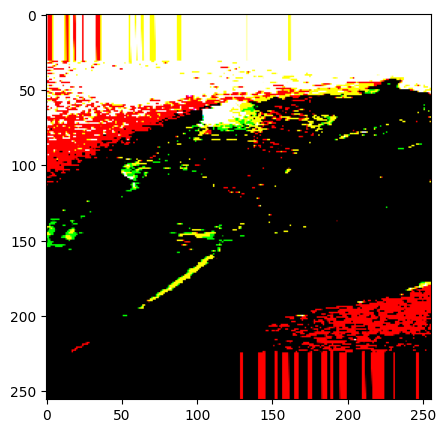

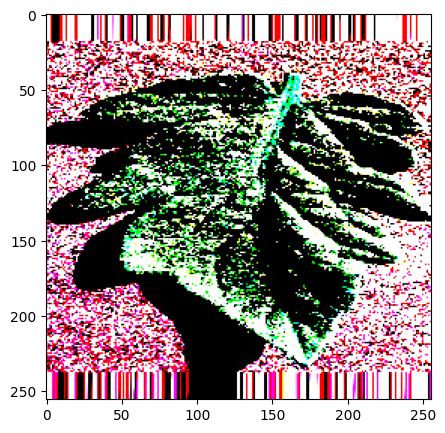

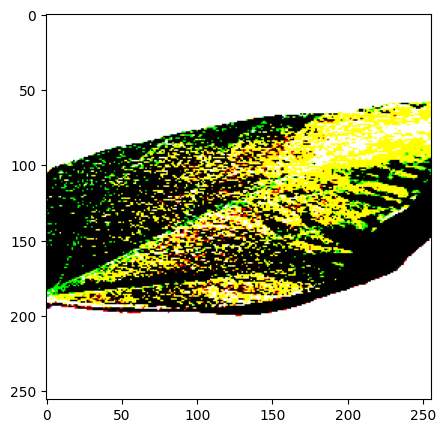

In [11]:
def plotimg(imgarr,label):
    for im,l in zip(imgarr,label):
        plt.figure(figsize=(5,5))
        plt.imshow(im)
    plt.show()

plotimg(t_img[:3],label[:3])

In [12]:
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model

In [13]:
base_model = VGG19(input_shape=(256,256,3),include_top=False)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [14]:
for layer in base_model.layers:
    layer.trainable = False

In [15]:
base_model.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

In [16]:
X = Flatten()(base_model.output)

X = Dense(units=38,activation='softmax')(X)

model = Model(base_model.input,X)

In [17]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 38)             │     1,245,222 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,269,606 (81.14 MB)

 Trainable params: 1,245,222 (4.75 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [18]:
model.compile(optimizer='adam',loss=tensorflow.keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# EarlyStopping monitors 'val_accuracy' with min_delta and patience
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=3, verbose=1)

# ModelCheckpoint saves the best model based only on 'val_accuracy'
mc = ModelCheckpoint(filepath='best_model.h5',
                     monitor='val_accuracy',
                     verbose=1,
                     save_best_only=True)

# Combine both callbacks
cb = [es, mc]


In [21]:
his = model.fit(train, 
                steps_per_epoch=16,
                epochs=50,
                verbose=1,
                callbacks=cb,
                validation_data=val,
                validation_steps=16)

c:\Users\91626\Documents\ANUSHREE\Python\venv310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.1248 - loss: 27.5149 
Epoch 1: val_accuracy improved from -inf to 0.30859, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 391s 25s/step - accuracy: 0.1282 - loss: 27.4614 - val_accuracy: 0.3086 - val_loss: 22.9083
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.2983 - loss: 21.1442 
Epoch 2: val_accuracy improved from 0.30859 to 0.46289, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 357s 23s/step - accuracy: 0.3023 - loss: 20.9820 - val_accuracy: 0.4629 - val_loss: 17.0765
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.4163 - loss: 16.2823 
Epoch 3: val_accuracy improved from 0.46289 to 0.59961, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 356s 23s/step - accuracy: 0.4195 - loss: 16.2220 - val_accuracy: 0.5996 - val_loss: 9.8139
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.5769 - loss: 10.0875 
Epoch 4: val_accuracy improved from 0.59961 to 0.60938, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 360s 23s/step - accuracy: 0.5773 - loss: 10.1023 - val_accuracy: 0.6094 - val_loss: 9.9285
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.6114 - loss: 10.8419 
Epoch 5: val_accuracy improved from 0.60938 to 0.61523, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 347s 22s/step - accuracy: 0.6097 - loss: 10.8496 - val_accuracy: 0.6152 - val_loss: 8.7611
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.6726 - loss: 8.9454 
Epoch 6: val_accuracy improved from 0.61523 to 0.65430, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 342s 22s/step - accuracy: 0.6720 - loss: 8.9721 - val_accuracy: 0.6543 - val_loss: 8.5218
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.6382 - loss: 8.9006 
Epoch 7: val_accuracy improved from 0.65430 to 0.68164, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 344s 22s/step - accuracy: 0.6389 - loss: 8.9056 - val_accuracy: 0.6816 - val_loss: 9.7612
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.6469 - loss: 8.7155 
Epoch 8: val_accuracy improved from 0.68164 to 0.68750, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 343s 22s/step - accuracy: 0.6479 - loss: 8.7047 - val_accuracy: 0.6875 - val_loss: 9.0656
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.7317 - loss: 7.0322 
Epoch 9: val_accuracy improved from 0.68750 to 0.69531, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 365s 24s/step - accuracy: 0.7306 - loss: 7.0985 - val_accuracy: 0.6953 - val_loss: 7.6595
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.6793 - loss: 8.9196 
Epoch 10: val_accuracy improved from 0.69531 to 0.73828, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 411s 27s/step - accuracy: 0.6795 - loss: 8.9259 - val_accuracy: 0.7383 - val_loss: 6.4852
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.7366 - loss: 7.5112 
Epoch 11: val_accuracy improved from 0.73828 to 0.77539, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 401s 26s/step - accuracy: 0.7350 - loss: 7.5409 - val_accuracy: 0.7754 - val_loss: 5.7133
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.7908 - loss: 6.6209 
Epoch 12: val_accuracy did not improve from 0.77539
16/16 ━━━━━━━━━━━━━━━━━━━━ 373s 24s/step - accuracy: 0.7888 - loss: 6.6836 - val_accuracy: 0.7266 - val_loss: 7.7548
Epoch 13/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.7419 - loss: 6.5712 
Epoch 13: val_accuracy did not improve from 0.77539
16/16 ━━━━━━━━━━━━━━━━━━━━ 342s 22s/step - accuracy: 0.7422 - loss: 6.5860 - val_accuracy: 0.7109 - val_loss: 9.2727
Epoch 14/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.7356 - loss: 8.2824 
Epoch 14: val_accuracy did not improve from 0.77539
16/16 ━━━━━━━━━━━━━━━━━━━━ 338s 22s/step - accuracy: 0.7363 - loss: 8.3111 - val_accuracy: 0.7109 - val_loss: 8.5916
Epoch 14: early stopping


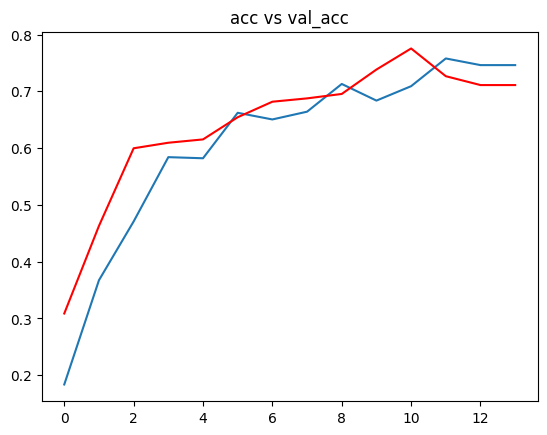

In [22]:
h = his.history

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c='red')
plt.title('acc vs val_acc')
plt.show()

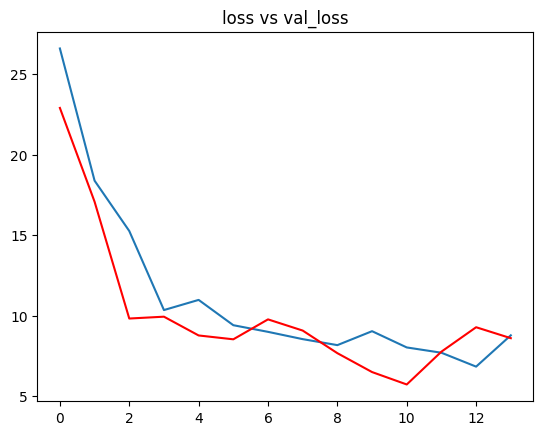

In [23]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c='red')
plt.title('loss vs val_loss')
plt.show()

In [24]:
from tensorflow.keras.models import load_model

model = load_model('best_model.h5')

In [25]:
acc = model.evaluate(val)[1]

print(f'The accuracy of our model on val data is {acc*100}')

550/550 ━━━━━━━━━━━━━━━━━━━━ 6020s 11s/step - accuracy: 0.7337 - loss: 6.9073
The accuracy of our model on val data is 73.42362999916077


In [26]:
ref = dict(zip(list(train.class_indices.values()),list(train.class_indices.keys())))

In [27]:
def prediction(path):
    img = load_img(path,target_size=(256,256))
    img = img_to_array(img)
    img = preprocess_input(img)
    img = np.expand_dims(img,axis=0)
    pred = np.argmax(model.predict(img))
    return ref[pred]

In [28]:
for i in os.listdir('data/images_for_test'):
    pred = prediction(f'data/images_for_test/{i}')
    print(f'Actual --> {i}')
    print(f'Predicted --> {pred}')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Actual --> AppleCedarRust1.JPG
Predicted --> Apple___Cedar_apple_rust
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 936ms/step
Actual --> AppleCedarRust2.JPG
Predicted --> Cherry_(including_sour)___healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Actual --> AppleCedarRust3.JPG
Predicted --> Apple___Cedar_apple_rust
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
Actual --> AppleCedarRust4.JPG
Predicted --> Apple___Cedar_apple_rust
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 897ms/step
Actual --> AppleScab1.JPG
Predicted --> Apple___Apple_scab
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 896ms/step
Actual --> AppleScab2.JPG
Predicted --> Apple___Apple_scab
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 884ms/step
Actual --> AppleScab3.JPG
Predicted --> Apple___Black_rot
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Actual --> CornCommonRust1.JPG
Predicted --> Corn_(maize)___Common_rust_
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 864ms/step
Actual --> CornCommonRust2.JPG
Predicted --> Corn_(maize)___Common_rust_
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 862ms/step
Actual -